## Task 1 : Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

### 1 - analyse data to reduce the complexity 

In [2]:
# import data
# data url path
path_data_negative = os.path.abspath('data/negative_examples_posology.csv')
path_data_positive = os.path.abspath('data/positive_examples_posology.csv')
# read data
data_negative = pd.read_csv(path_data_negative, header=0, names=['Id', 'Text'], index_col='Id')
data_positive = pd.read_csv(path_data_positive, header=0, names=['Id', 'Text'], index_col='Id')

In [3]:
data_negative.shape, data_positive.shape

((1457, 1), (496, 1))

In [4]:
# visualize the first five negative rows
data_negative.head()

,Text
Id,
1,ne 06/05/1995
3,centre dimagerie medicale pavillon
5,"78,75eur"
6,lundi 9h00/18h00
8,59100 roubaix


In [5]:
# visualize the last five  negative rows
data_negative.tail()

,Text
Id,
2587,personne recevant les soins (la ligne nom et p...
2590,identification du pharmacien ou du fouruisseur...
2591,|dispensation du 21/04/2021 a 12h43m30s
2595,"pointe a pitre, le 12/04/2021"
2596,paracetamol 1 g; voie orale; comprime


In [6]:
# visualize the first five positive rows
data_positive.head()

,Text
Id,
0,corgard 40 mg 1 comprimé le matin et le soir
1,peau atopique
2,quantité suffisante pour 14j
3,prendre 1/2 comprime toutes les 8 heures
4,19 kggraduation 1 a 4 fois par jour selon beso...


In [7]:
# visualize the last five negative rows
data_positive.head()

,Text
Id,
0,corgard 40 mg 1 comprimé le matin et le soir
1,peau atopique
2,quantité suffisante pour 14j
3,prendre 1/2 comprime toutes les 8 heures
4,19 kggraduation 1 a 4 fois par jour selon beso...


In [8]:
# add target column : 0 means it is not a posology 
data_negative['Target'] = 0
data_negative.tail()

,Text,Target
Id,,
2587,personne recevant les soins (la ligne nom et p...,0
2590,identification du pharmacien ou du fouruisseur...,0
2591,|dispensation du 21/04/2021 a 12h43m30s,0
2595,"pointe a pitre, le 12/04/2021",0
2596,paracetamol 1 g; voie orale; comprime,0


In [9]:
# add target column : 1 means it is a posology 
data_positive['Target'] = 1
data_positive.tail()

,Text,Target
Id,,
491,quantité suffisante pour 3 mois,1
492,1/ jour pendant 3 mois,1
493,1 comprime i fois par jourau meme moment de la...,1
494,etre pris en une prise unique le soir,1
495,mucomyst 2 fois par jour quantité suffisante p...,1


In [10]:
# concatenate both data_positive and data_negative into a dataframe named data
data = pd.concat([data_positive, data_negative], ignore_index=True)

In [11]:
# summarize the shape, nan, columns, dtype visualisation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1952 non-null   object
 1   Target  1953 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.6+ KB


Conclusion :
------------
The shape of the data is 1953 rows and 2 columns we get Text and target as column's name.</br> 
Text column has one missing value. The text column type is object and the target's one is integer

In [12]:
# check if nan is in the dataset
data.isnull().sum()

Text      1
Target    0
dtype: int64

In [13]:
# check the row where the data is null
np.where(pd.isnull(data))

(array([558], dtype=int64), array([0], dtype=int64))

In [14]:
# check if really 558's Text column's has NaN
data.iloc[558]

Text      NaN
Target      0
Name: 558, dtype: object

Conclusion:
-----------
We get the index who has NaN value (558). It comes from non posology examples

In [15]:
# As we have only few row who has NaN value, let's remove it
data.dropna(inplace=True)

In [16]:
# check unique values of each columns
data.nunique()

Text      1952
Target       2
dtype: int64

conclusion:
-----------
Our Text's column has 1952 unique value.
Our Target's column has 2 unique value that lead to a binary classification.

In [17]:
# count unique values in Target column
data.Target.value_counts()

0    1456
1     496
Name: Target, dtype: int64

In [18]:
data.shape

(1952, 2)

<AxesSubplot:ylabel='Target'>

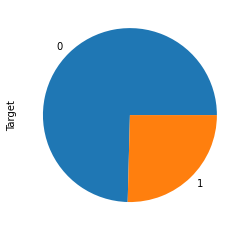

In [19]:
# distribution of targets values
data.Target.value_counts().plot(kind='pie')

conclusion :
------------
We get 1456 values for the class 0.
We get 496 values for the class 1.
that leads to imbalance data. 
So we are going to pay attention when splitting our dataframe.
We have to make sure that the split is random to ensure that the original data repartition is preserved in each split.

# Length of all document

In [20]:
# get the length of all documents
data['word_count'] = data.Text.apply(lambda i : len(i.split()))

In [21]:
data

,Text,Target,word_count
0,corgard 40 mg 1 comprimé le matin et le soir,1,10
1,peau atopique,1,2
2,quantité suffisante pour 14j,1,4
3,prendre 1/2 comprime toutes les 8 heures,1,7
4,19 kggraduation 1 a 4 fois par jour selon beso...,1,19
...,...,...,...
1948,personne recevant les soins (la ligne nom et p...,0,15
1949,identification du pharmacien ou du fouruisseur...,0,14
1950,|dispensation du 21/04/2021 a 12h43m30s,0,5
1951,"pointe a pitre, le 12/04/2021",0,5


In [22]:
#temp_test = pd.DataFrame(temp_test)

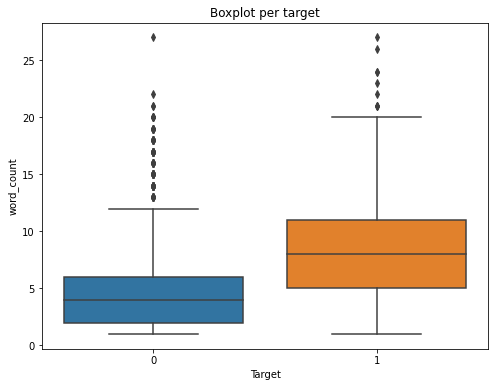

In [23]:
# plot temp_test boxplot
plt.figure(figsize = (8,6))
plt.title("Boxplot per target")
sns.boxplot(data=data, x='Target', y='word_count')
plt.show()

<Figure size 576x432 with 0 Axes>

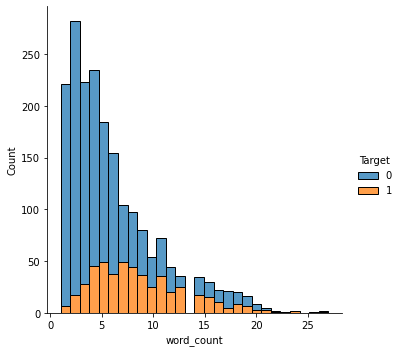

In [24]:
plt.figure(figsize = (8,6))
sns.displot(data=data, x="word_count", hue="Target", multiple="stack")
plt.show()

Conclusion :
-----------
The documents of the first group (Target = 0) is in general shorter than the second group (Target = 1)

In [25]:
## multivariate analysis

In [26]:
# print N random documents 

In [27]:
data_sample = data.sample(20)

In [28]:
def print_sample(data,n_sample = 10 ):
    """ print out n_sample from a document """
    sample = data.sample(n_sample)
    for idx, text in sample.iterrows():
        print("target",text["Target"],":",text["Text"])

In [29]:
# data1 is the dataframe where Target equal to 1
data1 = data[data.Target == 1]
data1.head()

,Text,Target,word_count
0,corgard 40 mg 1 comprimé le matin et le soir,1,10
1,peau atopique,1,2
2,quantité suffisante pour 14j,1,4
3,prendre 1/2 comprime toutes les 8 heures,1,7
4,19 kggraduation 1 a 4 fois par jour selon beso...,1,19


### Print posology's document

In [30]:
print_sample(data1)

target 1 : lactulose 1 sachet par jour
target 1 : pendant 10 jours
target 1 : prendre, par voie orale, 1 sachetdose le matin, pendant 5 jours
target 1 : 1 comprimé si besoin
target 1 : quantité suffisante pour 4 mois
target 1 : 1 gelule par jour, pendant 7 jours (1 le soir)
target 1 : 2 cuilleres a cafe matin, midi et soir pendant 3 mois
target 1 : 1 comprime tous les 2 jours pendant 6 mois
target 1 : 1 dose
target 1 : venter 1g 2 fois par jour, pour 2 semaines


### Print non posology's document

In [31]:
print_sample(data[data['Target']==0])

target 0 : i compierer var le pharmacien ou ie tournisseur qui delivre le medicament, le produit ou la prestation
target 0 : reconstructrice et esthetiquo
target 0 : reeducation perineale
target 0 : medecine generale
target 0 : terbutaline sulfate 5 mg/2 ml solution p inhal p nebulis (terbutaline mylan 5 mg/2 ml s p inh/nebulis en
target 0 : en cas dergence, ppelez le 15 membre dune association agreee, le reglenent des hongraizes par cheque est aczepte
target 0 : prescriptions relatives au traitement de l affection de longue duree reconnue (liste ou hors liste)
target 0 : deux paires de chaussettes de contention classe 2 a repouveler
target 0 : et dentaire
target 0 : 1/ prorhinel


## Text processing

In [32]:
# work on a specific document
# doc = data.sample(35)
doc = data.loc[1341]
doc = doc['Text']
doc

' stilnox 10 mg cpr pell sec 2plq/7 (14) (zolpidem tartrate dix milligrammes comprime)'

In [33]:
# lower
doc = doc.lower()
doc

' stilnox 10 mg cpr pell sec 2plq/7 (14) (zolpidem tartrate dix milligrammes comprime)'

In [34]:
# # tokenization
tokens = word_tokenize(doc)
tokens

['stilnox',
 '10',
 'mg',
 'cpr',
 'pell',
 'sec',
 '2plq/7',
 '(',
 '14',
 ')',
 '(',
 'zolpidem',
 'tartrate',
 'dix',
 'milligrammes',
 'comprime',
 ')']

In [35]:
# length of all tokens in a specific document
len(tokens)

17

In [36]:
# length of unique tokens in a specific document
len(set(tokens))

15

In [37]:
def display_token_info(tokens):
    """" display info about tokens """
    print(f"nombre de tokens {len(tokens)}, nombre de tokens uniques {len(set(tokens))}")
    print(tokens[:40])
    

In [38]:
display_token_info(tokens)

nombre de tokens 17, nombre de tokens uniques 15
['stilnox', '10', 'mg', 'cpr', 'pell', 'sec', '2plq/7', '(', '14', ')', '(', 'zolpidem', 'tartrate', 'dix', 'milligrammes', 'comprime', ')']


In [39]:
# french stopwords
stopwords = nltk.corpus.stopwords.words('french')

In [40]:
# filter tokens not present in stopwords
tokens = [t for t in tokens if not t in stopwords]
display_token_info(tokens)

nombre de tokens 17, nombre de tokens uniques 15
['stilnox', '10', 'mg', 'cpr', 'pell', 'sec', '2plq/7', '(', '14', ')', '(', 'zolpidem', 'tartrate', 'dix', 'milligrammes', 'comprime', ')']


In [41]:
# tokenizer using regular expression to keep alphanumeric , under_score 
tknizer = nltk.RegexpTokenizer(r"\w+")
tokens = tknizer.tokenize(doc)
tokens = [t for t in tokens if not t in stopwords]

In [42]:
display_token_info(tokens)

nombre de tokens 14, nombre de tokens uniques 14
['stilnox', '10', 'mg', 'cpr', 'pell', 'sec', '2plq', '7', '14', 'zolpidem', 'tartrate', 'dix', 'milligrammes', 'comprime']


## First cleaning function

In [43]:
# cleaning function
def cleaning_function(doc,rejoin = False ):
    """ function of text processing : it returns cleaned tokens or if rejoin (it joins cleaned tokens) """
    # lower and delete spaces
    doc = doc.lower().strip()
    # tokenize
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(doc)
    # stopwords
    stopwords = nltk.corpus.stopwords.words("french")
    # list cleaned tokens
    cleaned_tokens = [t for t in tokens if not t in stopwords]
    # 
    if rejoin:
        return " ".join(cleaned_tokens)
    else : 
        return cleaned_tokens

In [44]:
tokens = cleaning_function(doc)

In [45]:
display_token_info(tokens)

nombre de tokens 14, nombre de tokens uniques 14
['stilnox', '10', 'mg', 'cpr', 'pell', 'sec', '2plq', '7', '14', 'zolpidem', 'tartrate', 'dix', 'milligrammes', 'comprime']


## working on 1000 words from the entire corpus

In [46]:
# build raw corpus
raw_corpus = " ".join(data.Text.values)
raw_corpus[:1000]

'corgard 40 mg  1 comprimé le matin et le soir peau atopique quantité suffisante pour 14j prendre 1/2 comprime toutes les 8 heures 19 kggraduation 1 a 4 fois par jour selon besoin, en espacant les prises de 6h minimum pendant 3 une ampoule buvable tous les 2mois 6 mois prendre 1 comprime le matin  prendre, par voie orale, 1 ampoule par prise 1/2 mg par semaine, pendant 3 mois > a poser 1 heure avant les vaccins, 1 sur chaque cuisse prendre 1a 2 cuijlerees a renourelec au bout de 6 heures en cas de besoin pendant 2 semaines 1 comprime toutes les 6 heures (max3 cmprimesjour) si douelurs ou fievre sup a 38c pendent 6 jours 12 comprimé le soir pendant 8 semaine(s) ug par jour, en fonction de la reponse au traitement,, en un matin et soir pendant six jours 1 ampoule de vitamine d a la rentree une gelule a la fin dun repas au tout debut des regles le matin, a prendre, par voie vaginale, 1 ovule au coucher et alterner avee elution ducray  rulid 150 mg 1 matin et soir quantité suffisante pour 

In [47]:
# process the corpus
corpus = cleaning_function(raw_corpus)
display_token_info(corpus)

nombre de tokens 9651, nombre de tokens uniques 2866
['corgard', '40', 'mg', '1', 'comprimé', 'matin', 'soir', 'peau', 'atopique', 'quantité', 'suffisante', '14j', 'prendre', '1', '2', 'comprime', 'toutes', '8', 'heures', '19', 'kggraduation', '1', 'a', '4', 'fois', 'jour', 'selon', 'besoin', 'espacant', 'prises', '6h', 'minimum', 'pendant', '3', 'ampoule', 'buvable', 'tous', '2mois', '6', 'mois']


In [48]:
# tokens value count
tmp = pd.Series(corpus).value_counts()

In [49]:
# display most tokens
tmp.head(10)

1           378
a           228
2           173
mg          166
pendant     156
matin       129
3           128
comprime    128
mois        124
soir        117
dtype: int64

In [50]:
tmp.tail(10)

dor                  1
val                  1
78000                1
stav                 1
patieni              1
tanhlificadon        1
electromyographie    1
chirurgle            1
dcetre               1
pitre                1
dtype: int64

In [51]:
tmp.describe()

count    2866.000000
mean        3.367411
std        12.658491
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       378.000000
dtype: float64

In [52]:
# list rare tokens
# unique words -> not useful (hypothesis)
tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp==1]
len(list_unique_words)

1938

In [53]:
# save 
tmp = pd.DataFrame({"unique words": list_unique_words})

In [54]:
tmp.to_csv("list_unique_words.csv", index= False)

In [55]:
# same for at least 5 times
tmp = pd.Series(corpus).value_counts()
list_five_words = tmp[tmp<=5]
len(list_five_words)

2598

In [56]:
# save 
tmp = pd.DataFrame({"5 words": list_five_words})
tmp.to_csv("list_five_words.csv", index= False)

In [57]:
# list rare tokens
# unique words -> not useful
tmp = pd.Series(corpus).value_counts()
list_ten_words = tmp[tmp<=10]
len(list_ten_words)

2724

In [58]:
# save 
tmp = pd.DataFrame({"10 words": list_five_words})
tmp.to_csv("list_ten_words.csv", index= False)

## second cleaning function

In [59]:
# cleaning function
def cleaning_function2(doc,rejoin = False, list_rare_words = None, min_len_words = 3, force_is_alpha = True ):
    """ function of text processing : it returns cleaned tokens or if rejoin (it joins cleaned tokens) """
    
    if not list_rare_words :
        list_rare_words = []
    # lower and delete spaces
    doc = doc.lower().strip()
    # tokenize
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(doc)
    # stopwords
    stopwords = nltk.corpus.stopwords.words("french")
    # list cleaned tokens
    cleaned_tokens = [t for t in tokens if t not in stopwords]
    # no rare tokens
    no_rare_tokens = [t for t in cleaned_tokens if t not in list_rare_words]
    # no more len words 
    no_more_len_words = [t for t in no_rare_tokens if len(t) >= min_len_words]
    # only alpha chars
    if force_is_alpha:
        alpha_tokens = [t for t in no_more_len_words if t.isalpha()]
    else : 
        alpha_tokens = no_more_len_words
    # 
    if rejoin:
        return " ".join(alpha_tokens)
    else : 
        return alpha_tokens

In [60]:
display_token_info(corpus)

nombre de tokens 9651, nombre de tokens uniques 2866
['corgard', '40', 'mg', '1', 'comprimé', 'matin', 'soir', 'peau', 'atopique', 'quantité', 'suffisante', '14j', 'prendre', '1', '2', 'comprime', 'toutes', '8', 'heures', '19', 'kggraduation', '1', 'a', '4', 'fois', 'jour', 'selon', 'besoin', 'espacant', 'prises', '6h', 'minimum', 'pendant', '3', 'ampoule', 'buvable', 'tous', '2mois', '6', 'mois']


In [61]:
len(corpus)

9651

In [62]:
len(set(corpus))

2866

In [63]:
# apply the second cleaning function on the corpus
corpus = cleaning_function2(raw_corpus,list_rare_words=list(list_unique_words))

In [64]:
display_token_info(corpus)

nombre de tokens 6535, nombre de tokens uniques 2334
['corgard', 'comprimé', 'matin', 'soir', 'peau', 'atopique', 'quantité', 'suffisante', 'prendre', 'comprime', 'toutes', 'heures', 'kggraduation', 'fois', 'jour', 'selon', 'besoin', 'espacant', 'prises', 'minimum', 'pendant', 'ampoule', 'buvable', 'tous', 'mois', 'prendre', 'comprime', 'matin', 'prendre', 'voie', 'orale', 'ampoule', 'prise', 'semaine', 'pendant', 'mois', 'poser', 'heure', 'avant', 'vaccins']


In [65]:
len(set(corpus))

2334

In [66]:
## stem and lem
stemmer=nltk.stem.SnowballStemmer('french')

In [67]:
text = "Je suis emmanuel gnofam de la places ; je Suis thesard en NLP à posos une entreprise de la place"

In [68]:
list_stem = [stemmer.stem(m) for m in text.split(" ")]
list_stem

['je',
 'suis',
 'emmanuel',
 'gnofam',
 'de',
 'la',
 'plac',
 ';',
 'je',
 'suis',
 'thesard',
 'en',
 'nlp',
 'à',
 'posos',
 'une',
 'entrepris',
 'de',
 'la',
 'plac']

## third function

In [69]:
# cleaning function
def cleaning_function3(doc,rejoin = False,list_rare_words = None, min_len_words = 3, force_is_alpha = True ):
    """ function of text processing : it returns cleaned tokens or if rejoin (it joins cleaned tokens) """
    
    if not list_rare_words :
        list_rare_words = []
    # lower and delete spaces
    doc = doc.lower().strip()
    # tokenize
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(doc)
    # stopwords
    stopwords = nltk.corpus.stopwords.words("french")
    # list cleaned tokens
    cleaned_tokens = [t for t in tokens if t not in stopwords]
    # no rare tokens
    no_rare_tokens = [t for t in cleaned_tokens if t not in list_rare_words]
    # no more len words 
    no_more_len_words = [t for t in no_rare_tokens if len(t) >= min_len_words]
    # only alpha chars
    if force_is_alpha:
        alpha_tokens = [t for t in no_more_len_words if t.isalpha()]
    else : 
        alpha_tokens = no_more_len_words
    # stemmer 
    stemmer_tokens = [stemmer.stem(m) for m in alpha_tokens]
    # 
    if rejoin:
        return " ".join(stemmer_tokens)
    else : 
        return stemmer_tokens

In [70]:
corpus = cleaning_function3(raw_corpus, rejoin=False,list_rare_words=list(list_unique_words))

In [71]:
len(corpus)

6535

In [72]:
len(set(corpus))

2129

## same process with list_five_words and list_ten_words

In [73]:
## wordcloud

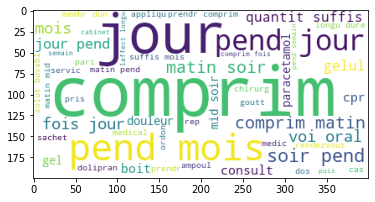

In [74]:
wordcloud = WordCloud(background_color='white', stopwords=[], max_words=50).generate(" ".join(corpus))
plt.imshow(wordcloud)

## divide the corpus

In [75]:
# dataframe 1 contains 1 as their target value
df1 = data[data.Target == 1]
df1.head()

,Text,Target,word_count
0,corgard 40 mg 1 comprimé le matin et le soir,1,10
1,peau atopique,1,2
2,quantité suffisante pour 14j,1,4
3,prendre 1/2 comprime toutes les 8 heures,1,7
4,19 kggraduation 1 a 4 fois par jour selon beso...,1,19


In [76]:
# dataframe 0 contains 0 as their target value
df0 = data[data.Target == 0]
df0.head()

,Text,Target,word_count
496,ne 06/05/1995,0,2
497,centre dimagerie medicale pavillon,0,4
498,"78,75eur",0,1
499,lundi 9h00/18h00,0,2
500,59100 roubaix,0,2


In [77]:
# corpus
corpus1 = " ".join(df1.Text)
corpus0 = " ".join(df0.Text)

In [78]:
corpus1[:1000]

'corgard 40 mg  1 comprimé le matin et le soir peau atopique quantité suffisante pour 14j prendre 1/2 comprime toutes les 8 heures 19 kggraduation 1 a 4 fois par jour selon besoin, en espacant les prises de 6h minimum pendant 3 une ampoule buvable tous les 2mois 6 mois prendre 1 comprime le matin  prendre, par voie orale, 1 ampoule par prise 1/2 mg par semaine, pendant 3 mois > a poser 1 heure avant les vaccins, 1 sur chaque cuisse prendre 1a 2 cuijlerees a renourelec au bout de 6 heures en cas de besoin pendant 2 semaines 1 comprime toutes les 6 heures (max3 cmprimesjour) si douelurs ou fievre sup a 38c pendent 6 jours 12 comprimé le soir pendant 8 semaine(s) ug par jour, en fonction de la reponse au traitement,, en un matin et soir pendant six jours 1 ampoule de vitamine d a la rentree une gelule a la fin dun repas au tout debut des regles le matin, a prendre, par voie vaginale, 1 ovule au coucher et alterner avee elution ducray  rulid 150 mg 1 matin et soir quantité suffisante pour 

In [79]:
corpus0[:1000]

'ne 06/05/1995 centre dimagerie medicale pavillon 78,75eur lundi 9h00/18h00 59100 roubaix agee de 56 ans pulmicort img aeroso! pharmacie de la gare mardi 9h00/18h00 12140 clamart 92130 issylesmoulineaux cabin hopitaux universitaires paris centre scannez ce code barre pour retrouver cette ordonnance prescpt oper mercredi 15 septembre 2021 issy les moulineaux, 05/10/2021 monyant total fettovs 25 47 03 triafem) cpr 3x21  1 airomir autohaler 100 microg susp(salbutamol 100 ug suspension pour inhalation) inexium 20 9h30 a 12h 30, 14h a 19h produit ou prestation, indiquer sa designation precise  5- daflon 500mg cpr 30 (fraction flavonoique) 4) amitriptyline (chlorhydrate) 40 mg/ml solution buvable en gte ans service des maladies mandibulairo 15 septembre 2021 chirurgie gynecologique et mammaire praticien a la fondation ophtalmologique a de rothschild a meudon, le 17/09/2021 d sylvaine hamelin > colchicine 1 mg fasquelle  rabeprazole arrow generiques 20 mg cpr gastrores plq/14 bote) |dispensat

# process both of them

In [80]:
corpus1 = cleaning_function3(corpus1,rejoin=False,list_rare_words=list(list_unique_words))

In [81]:
corpus0 = cleaning_function3(corpus0,rejoin=False,list_rare_words=list(list_unique_words))

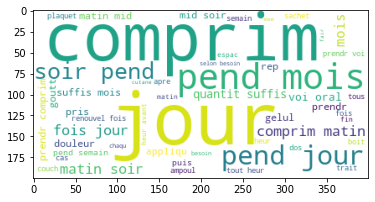

In [82]:
# wordcloud 1
wordcloud1 = WordCloud(background_color='white', stopwords=[], max_words=50).generate(" ".join(corpus1))
plt.imshow(wordcloud1)
plt.show()

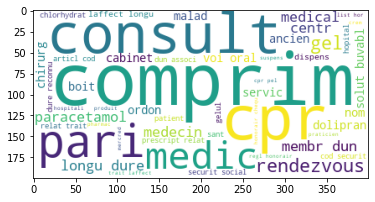

In [83]:
# wordcloud 0
wordcloud0 = WordCloud(background_color='white', stopwords=[], max_words=50).generate(" ".join(corpus0))
plt.imshow(wordcloud0)
plt.show()

In [84]:
# check repeated values in 10 elements of corpus0 and corpus1
n = 10
doublons  = [i for i in pd.Series(corpus1).value_counts().head(n).index
                if i in pd.Series(corpus0).value_counts().head(n).index
            ]
doublons

['comprim', 'voi']

In [85]:
# check repeated values in 50 elements of corpus0 and corpus1
n = 50
doublons  = [i for i in pd.Series(corpus1).value_counts().head(n).index
                if i in pd.Series(corpus0).value_counts().head(n).index
            ]
doublons

['comprim', 'voi', 'oral', 'trait', 'boit', 'cas', 'san']

## fourth cleaning function

In [86]:
# cleaning function
def cleaning_function4(doc,rejoin = False,list_rare_words = None, min_len_words = 3, force_is_alpha = True, extra_words = None ):
    """ function of text processing : it returns cleaned tokens or if rejoin (it joins cleaned tokens) """
    
    if not list_rare_words :
        list_rare_words = []
    # lower and delete spaces
    doc = doc.lower().strip()
    # tokenize
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(doc)
    # stopwords
    stopwords = nltk.corpus.stopwords.words("french")
    # list cleaned tokens
    cleaned_tokens = [t for t in tokens if t not in stopwords]
    # no rare tokens
    no_rare_tokens = [t for t in cleaned_tokens if t not in list_rare_words]
    # no more len words 
    no_more_len_words = [t for t in no_rare_tokens if len(t) >= min_len_words]
    # only alpha chars
    if force_is_alpha:
        alpha_tokens = [t for t in no_more_len_words if t.isalpha()]
    else : 
        alpha_tokens = no_more_len_words
    # stemmer 
    stemmer_tokens = [stemmer.stem(m) for m in alpha_tokens]
    # extra words
    final = [i for i in stemmer_tokens if i not in extra_words]
    # 
    if rejoin:
        return " ".join(final)
    else : 
        return final

In [87]:
def cleaning_function5(doc):
    corpus = cleaning_function4(raw_corpus, rejoin=True, 
                                list_rare_words= list(list_unique_words), extra_words=doublons)
    return corpus
    

In [88]:
clean_text = cleaning_function5(raw_corpus)

Conclusion:
-----------
These cleaning functions are made to be performed on the dataset . We'll check the model improvment

# Model Building

In [89]:
# import specific libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score

In [90]:
data

,Text,Target,word_count
0,corgard 40 mg 1 comprimé le matin et le soir,1,10
1,peau atopique,1,2
2,quantité suffisante pour 14j,1,4
3,prendre 1/2 comprime toutes les 8 heures,1,7
4,19 kggraduation 1 a 4 fois par jour selon beso...,1,19
...,...,...,...
1948,personne recevant les soins (la ligne nom et p...,0,15
1949,identification du pharmacien ou du fouruisseur...,0,14
1950,|dispensation du 21/04/2021 a 12h43m30s,0,5
1951,"pointe a pitre, le 12/04/2021",0,5


In [91]:
X = data['Text']
X.head()

0        corgard 40 mg  1 comprimé le matin et le soir
1                                        peau atopique
2                         quantité suffisante pour 14j
3             prendre 1/2 comprime toutes les 8 heures
4    19 kggraduation 1 a 4 fois par jour selon beso...
Name: Text, dtype: object

In [92]:
y = data.Target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [93]:
# split data into train, test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1561,), (391,), (1561,), (391,))

In [94]:
# evaluation
#print(classification_report(y_test, y_pred))

In [95]:
# export the build model
#dump(lr,'exported_posology.joblib')

### pipeline

In [96]:
from sklearn.pipeline import Pipeline

In [97]:
pipe = Pipeline([('countvectorizer', CountVectorizer(binary=True)), ('lr_model',LogisticRegression())])

In [98]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(binary=True)),
                ('lr_model', LogisticRegression())])

In [99]:
# predictions
y_pred = pipe.predict(X_test)

In [100]:
print(f'the precision = {pipe.score(X_test,y_test)}')

the precision = 0.9258312020460358


In [101]:
print(f'the recall = {recall_score(y_test,y_pred)}')

the recall = 0.7722772277227723


In [102]:
score_f1 = f1_score(y_test,y_pred)
print(f'f1 score = {score_f1}')

f1 score = 0.8432432432432432


In [103]:
# export the build pipeline model
dump(pipe,'exported_posology.joblib')

['exported_posology.joblib']